In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen
from urllib.error import URLError, HTTPError

In [2]:
url = 'https://www.fundsexplorer.com.br/ranking'
try:
    req = Request(url, headers={'User-Agent':'Mozilla/5.0'})
    response = urlopen(req)
    html = response.read()
    soup=BeautifulSoup(html,'html.parser')
except HTTPError as e:
    print(e.status, e.reason)
except URLError as e:
    print(e.reason)

In [18]:
tr_tag = soup.find_all('tr')[0].get_text()
tr_text = tr_tag.split('\n')

df_columns = tr_text[1:27]

['Códigodo fundo',
 'Setor',
 'Preço Atual',
 'Liquidez Diária',
 'Dividendo',
 'DividendYield',
 'DY (3M)Acumulado',
 'DY (6M)Acumulado',
 'DY (12M)Acumulado',
 'DY (3M)Média',
 'DY (6M)Média',
 'DY (12M)Média',
 'DY Ano',
 'Variação Preço',
 'Rentab.Período',
 'Rentab.Acumulada',
 'PatrimônioLíq.',
 'VPA',
 'P/VPA',
 'DYPatrimonial',
 'VariaçãoPatrimonial',
 'Rentab. Patr.no Período',
 'Rentab. Patr.Acumulada',
 'VacânciaFísica',
 'VacânciaFinanceira',
 'QuantidadeAtivos']

A tag `<tbody>` é a tag que encontramos as informações de cada fii.

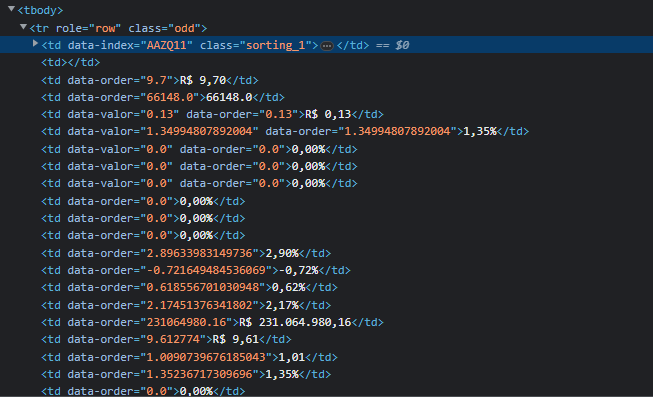

Os dados de cada FII estão dentro de um intervalo de 26 linhas.

In [8]:
lista_dados = list(soup.find_all('td'))

In [9]:
lista_codigo_fundo = lista_dados[0::26]
lista_setor = lista_dados[1::26]
lista_preco_atual = lista_dados[2::26]
lista_liquidez_diaria = lista_dados[3::26]
lista_dividendo = lista_dados[4::26]
lista_dividend_yield = lista_dados[5::26]
lista_dy_3m_acumulado = lista_dados[6::26]
lista_dy_6m_acumulado = lista_dados[7::26]
lista_dy_12m_acumulado = lista_dados[8::26]
lista_dy_3m_media = lista_dados[9::26]
lista_dy_6m_media = lista_dados[10::26]
lista_dy_12m_media = lista_dados[11::26]
lista_dy_ano = lista_dados[12::26]
lista_variacao_preco = lista_dados[13::26]
lista_rentabilidade_periodo = lista_dados[14::26]
lista_rentabilidade_acumulada = lista_dados[15::26]
lista_patrimonio_liquido = lista_dados[16::26]
lista_vpa = lista_dados[17::26]
lista_p_vpa = lista_dados[18::26]
lista_dy_patrimonial = lista_dados[19::26]
lista_variacao_patrimonial = lista_dados[20::26]
lista_rentablidade_patrimonial_no_periodo = lista_dados[21::26]
lista_rentabilidade_patrimonial_acumulada = lista_dados[22::26]
lista_vacancia_fisica = lista_dados[23::26]
lista_vacancia_financeira = lista_dados[24::26]
lista_quantidade_ativos = lista_dados[25::26]

In [10]:
def castHtmlTagForList(lista):
    html_to_list = [str(l) for l in lista]
    lista_separada_por_virgula = ', '.join(html_to_list)
    soup = BeautifulSoup(lista_separada_por_virgula, 'html.parser')
    lista = soup.get_text()
    lista = lista.split(', ')
    
    return lista

In [12]:
df_fii = pd.DataFrame([], columns=df_columns)

In [14]:
df_fii.rename(columns={
    'Códigodo fundo':'chr_nm_codigo_fundo',
    'Setor':'chr_nm_setor',
    'Preço Atual':'num_vlr_preco_atual',
    'Liquidez Diária':'num_vlr_liquidez_diaria',
    'Dividendo':'num_vlr_dividendo',
    'DividendYield':'num_vlr_dividend_yield',
    'DY (3M)Acumulado':'num_vlr_dy_3m_acumulado',
    'DY (6M)Acumulado':'num_vlr_dy_6m_acumulado',
    'DY (12M)Acumulado':'num_vlr_dy_12m_acumulado',
    'DY (3M)Média':'num_vlr_dy_3m_media',
    'DY (6M)Média':'num_vlr_dy_6m_media',
    'DY (12M)Média':'num_vlr_dy_12m_media',
    'DY Ano':'num_vlr_dy_ano',
    'Variação Preço':'num_vlr_variacao_preco',
    'Rentab.Período':'num_vlr_rentabilidade_no_periodo',
    'Rentab.Acumulada':'num_vlr_rentabilidade_acumulada',
    'PatrimônioLíq.':'num_vlr_patrimonio_liquido',
    'VPA':'num_vlr_vpa', 
    'P/VPA':'num_vlr_p_vpa',
    'DYPatrimonial':'num_vlr_dy_patrimonial',
    'VariaçãoPatrimonial':'num_vlr_variacao_patrimonial',
    'Rentab. Patr.no Período':'num_vlr_rentabilidade_patrimonial_no_periodo',
    'Rentab. Patr.Acumulada':'num_vlr_rentabilidade_patrimonial_acumulada',
    'VacânciaFísica':'num_vlr_vacancia_fisica',
    'VacânciaFinanceira':'num_vlr_vacancia_financeira',
    'QuantidadeAtivos':'num_vlr_quantidade_ativos'
}, inplace=True)

In [16]:
df_fii['chr_nm_codigo_fundo'] = castHtmlTagForList(lista_codigo_fundo)
df_fii['chr_nm_setor'] = castHtmlTagForList(lista_setor)
df_fii['num_vlr_preco_atual'] = castHtmlTagForList(lista_preco_atual)
df_fii['num_vlr_liquidez_diaria'] = castHtmlTagForList(lista_liquidez_diaria)
df_fii['num_vlr_dividendo'] = castHtmlTagForList(lista_dividendo)
df_fii['num_vlr_dividend_yield'] = castHtmlTagForList(lista_dividend_yield)
df_fii['num_vlr_dy_3m_acumulado'] = castHtmlTagForList(lista_dy_3m_acumulado)
df_fii['num_vlr_dy_6m_acumulado'] = castHtmlTagForList(lista_dy_6m_acumulado)
df_fii['num_vlr_dy_12m_acumulado'] = castHtmlTagForList(lista_dy_12m_acumulado)
df_fii['num_vlr_dy_3m_media'] = castHtmlTagForList(lista_dy_3m_media)
df_fii['num_vlr_dy_6m_media'] = castHtmlTagForList(lista_dy_6m_media)
df_fii['num_vlr_dy_12m_media'] = castHtmlTagForList(lista_dy_12m_media)
df_fii['num_vlr_dy_ano'] = castHtmlTagForList(lista_dy_ano)
df_fii['num_vlr_variacao_preco'] = castHtmlTagForList(lista_variacao_preco)
df_fii['num_vlr_rentabilidade_no_periodo'] = castHtmlTagForList(lista_rentabilidade_periodo)
df_fii['num_vlr_rentabilidade_acumulada'] = castHtmlTagForList(lista_rentabilidade_acumulada)
df_fii['num_vlr_patrimonio_liquido'] = castHtmlTagForList(lista_patrimonio_liquido)
df_fii['num_vlr_vpa'] = castHtmlTagForList(lista_vpa)
df_fii['num_vlr_p_vpa'] = castHtmlTagForList(lista_p_vpa)
df_fii['num_vlr_dy_patrimonial'] = castHtmlTagForList(lista_dy_patrimonial)
df_fii['num_vlr_variacao_patrimonial'] = castHtmlTagForList(lista_variacao_patrimonial)
df_fii['num_vlr_rentabilidade_patrimonial_no_periodo'] = castHtmlTagForList(lista_rentablidade_patrimonial_no_periodo)
df_fii['num_vlr_rentabilidade_patrimonial_acumulada'] = castHtmlTagForList(lista_rentabilidade_patrimonial_acumulada)
df_fii['num_vlr_vacancia_fisica'] = castHtmlTagForList(lista_vacancia_fisica)
df_fii['num_vlr_vacancia_financeira'] = castHtmlTagForList(lista_vacancia_financeira)
df_fii['num_vlr_quantidade_ativos'] = castHtmlTagForList(lista_quantidade_ativos)

In [17]:
df_fii

,chr_nm_codigo_fundo,chr_nm_setor,num_vlr_preco_atual,num_vlr_liquidez_diaria,num_vlr_dividendo,num_vlr_dividend_yield,num_vlr_dy_3m_acumulado,num_vlr_dy_6m_acumulado,num_vlr_dy_12m_acumulado,num_vlr_dy_3m_media,...,num_vlr_patrimonio_liquido,num_vlr_vpa,num_vlr_p_vpa,num_vlr_dy_patrimonial,num_vlr_variacao_patrimonial,num_vlr_rentabilidade_patrimonial_no_periodo,num_vlr_rentabilidade_patrimonial_acumulada,num_vlr_vacancia_fisica,num_vlr_vacancia_financeira,num_vlr_quantidade_ativos
0,FIVN11,Shoppings,"R$ 3,14",19986.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 72.350.178,26","R$ 7,69","0,41",N/A,N/A,N/A,N/A,"56,00%",N/A,1
1,BZLI11,Títulos e Val. Mob.,"R$ 17,90",5.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 448.299.746,09","R$ 10,77","1,66",N/A,N/A,N/A,N/A,N/A,N/A,0
2,XTED11,Lajes Corporativas,"R$ 8,82",2223.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 27.688.895,17","R$ 13,26","0,67",N/A,N/A,N/A,N/A,"0,00%","100,00%",1
3,ALMI11,Lajes Corporativas,"R$ 804,00",10.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 224.603.756,71","R$ 2.020,24","0,40",N/A,N/A,N/A,N/A,"64,05%",N/A,1
4,PABY11,Híbrido,"R$ 13,72",7.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ -12.536.949,41","R$ -16,53","-0,83",N/A,N/A,N/A,N/A,N/A,N/A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,MATV11,Títulos e Val. Mob.,"R$ 81,01",2.0,"R$ 0,60","0,74%","3,18%","5,84%","13,27%","1,06%",...,"R$ 39.226.174,04","R$ 92,09","0,88","0,87%","-1,34%","-0,49%","-0,81%",N/A,N/A,0
315,BLMC11,Outros,"R$ 74,30",1.0,"R$ 0,87","1,18%","3,28%","5,87%","13,56%","1,09%",...,"R$ 38.382.613,19","R$ 96,08","0,77","0,84%","0,00%","0,84%","0,84%",N/A,N/A,0
316,BTLG11,Logística,"R$ 93,89",32910.0,"R$ 0,74","0,79%","2,35%","4,59%","8,99%","0,78%",...,"R$ 2.089.628.167,96","R$ 99,19","0,95","0,75%","0,09%","0,84%","4,82%",N/A,"2,00%",16
317,RZAK11,Títulos e Val. Mob.,"R$ 92,50",26909.0,"R$ 1,20","1,30%","3,98%","8,38%","18,11%","1,33%",...,"R$ 360.999.586,28","R$ 92,64","1,00","1,62%","-0,41%","1,20%","7,90%",N/A,N/A,0
